# Analysis of EPA and Census Data

## Methods
 - Logistic regression of carcinogens and socioeconomic data
 - All chemicals and socioeconomic data
     - Logistic regression
     - Linear regression
     - Decision tree
     - Random Forest
 - Harris county releases and socioeconomic data
     - Linear regression
     - Logistic regression

In [8]:
#Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [10]:
df = pd.read_csv('Cleaned Data/capstone_cleaned_3.csv')
df

,Unnamed: 0,ZIP,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Total Releases Binned
0,0,77511,4.881777e+06,47393,12.514506,55.833140,2.321018,0.160361,1.042348,0.027430,2.795772,39.896187,3.990041,16.333636,29.972781,32.215728,49.059988,64.382926,76.952293,4
1,1,77979,3.529298e+06,17599,13.267799,36.678220,2.977442,0.068186,6.273084,0.039775,1.948974,54.207625,3.812717,19.904540,34.876982,37.587363,55.719075,68.617535,79.442014,4
2,2,77536,3.511945e+06,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015,4
3,3,77530,1.386491e+06,33387,16.922754,18.770779,12.441968,0.000000,0.185701,0.000000,3.240782,67.472369,9.488723,25.755534,39.997604,42.121185,61.014766,80.252793,87.507114,4
4,4,78380,1.007567e+06,24147,23.597134,20.072887,0.401706,0.583923,0.062120,0.000000,2.199031,78.924918,10.456786,27.303599,38.191080,41.528968,58.392347,72.311260,83.451360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,456,77061,0.000000e+00,26253,20.024378,8.246677,23.364949,0.239973,5.450806,0.087609,22.271740,63.501314,10.261684,28.221537,46.352798,51.902640,69.165429,77.793014,88.511789,1
457,457,78735,0.000000e+00,17814,7.488492,66.402829,2.907825,0.000000,8.919951,0.000000,1.263052,20.051645,2.133154,8.914337,13.596048,14.808578,22.123049,31.548221,39.609296,1
458,458,76155,0.000000e+00,5813,8.360571,23.636676,34.302426,0.928952,16.377086,0.000000,3.629795,20.729400,3.285739,8.773439,23.550662,26.131085,45.776707,66.093239,77.722346,1
459,459,77048,0.000000e+00,18296,24.289462,2.273721,66.812418,0.054657,1.688894,0.000000,7.373196,29.509182,13.325317,35.608876,48.387626,50.448185,60.980542,73.026891,84.400962,1


In [11]:
df = df.drop(columns='Unnamed: 0', axis = 1)
df

,ZIP,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Total Releases Binned
0,77511,4.881777e+06,47393,12.514506,55.833140,2.321018,0.160361,1.042348,0.027430,2.795772,39.896187,3.990041,16.333636,29.972781,32.215728,49.059988,64.382926,76.952293,4
1,77979,3.529298e+06,17599,13.267799,36.678220,2.977442,0.068186,6.273084,0.039775,1.948974,54.207625,3.812717,19.904540,34.876982,37.587363,55.719075,68.617535,79.442014,4
2,77536,3.511945e+06,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015,4
3,77530,1.386491e+06,33387,16.922754,18.770779,12.441968,0.000000,0.185701,0.000000,3.240782,67.472369,9.488723,25.755534,39.997604,42.121185,61.014766,80.252793,87.507114,4
4,78380,1.007567e+06,24147,23.597134,20.072887,0.401706,0.583923,0.062120,0.000000,2.199031,78.924918,10.456786,27.303599,38.191080,41.528968,58.392347,72.311260,83.451360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,77061,0.000000e+00,26253,20.024378,8.246677,23.364949,0.239973,5.450806,0.087609,22.271740,63.501314,10.261684,28.221537,46.352798,51.902640,69.165429,77.793014,88.511789,1
457,78735,0.000000e+00,17814,7.488492,66.402829,2.907825,0.000000,8.919951,0.000000,1.263052,20.051645,2.133154,8.914337,13.596048,14.808578,22.123049,31.548221,39.609296,1
458,76155,0.000000e+00,5813,8.360571,23.636676,34.302426,0.928952,16.377086,0.000000,3.629795,20.729400,3.285739,8.773439,23.550662,26.131085,45.776707,66.093239,77.722346,1
459,77048,0.000000e+00,18296,24.289462,2.273721,66.812418,0.054657,1.688894,0.000000,7.373196,29.509182,13.325317,35.608876,48.387626,50.448185,60.980542,73.026891,84.400962,1


In [12]:
#Check for missing values
#Population of zero

null_data = df[df.isnull().any(axis=1)]
null_data

,ZIP,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Total Releases Binned
257,79916,96.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [13]:
#Remove that row
df = df.drop(257)

In [14]:
null_data = df[df.isnull().any(axis=1)]
null_data

,ZIP,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Total Releases Binned


## Logistic Regression Just Carcinogens- Including all Features

In [15]:
y = df['Total Releases Binned']
y.head()

0    4
1    4
2    4
3    4
4    4
Name: Total Releases Binned, dtype: int64

In [16]:
X = df.drop(columns=['ZIP', 'Total Releases', 'Total Releases Binned'], axis=1)
X.head()

,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL
0,47393,12.514506,55.833140,2.321018,0.160361,1.042348,0.027430,2.795772,39.896187,3.990041,16.333636,29.972781,32.215728,49.059988,64.382926,76.952293
1,17599,13.267799,36.678220,2.977442,0.068186,6.273084,0.039775,1.948974,54.207625,3.812717,19.904540,34.876982,37.587363,55.719075,68.617535,79.442014
2,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015
3,33387,16.922754,18.770779,12.441968,0.000000,0.185701,0.000000,3.240782,67.472369,9.488723,25.755534,39.997604,42.121185,61.014766,80.252793,87.507114
4,24147,23.597134,20.072887,0.401706,0.583923,0.062120,0.000000,2.199031,78.924918,10.456786,27.303599,38.191080,41.528968,58.392347,72.311260,83.451360


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef5e505080>,
      dtype=object)

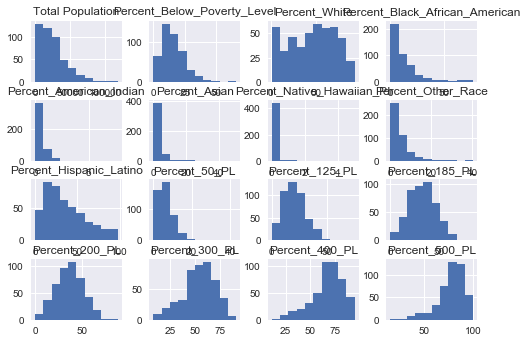

In [17]:
X.hist()

In [18]:
X.isna().sum()

Total Population                  0
Percent_Below_Poverty_Level       0
Percent_White                     0
Percent_Black_African_American    0
Percent_American_Indian           0
Percent_Asian                     0
Percent_Native_Hawaiian_PI        0
Percent_Other_Race                0
Percent_Hispanic_Latino           0
Percent_50_PL                     0
Percent_125_PL                    0
Percent_185_PL                    0
Percent_200_PL                    0
Percent_300_PL                    0
Percent_400_PL                    0
Percent_500_PL                    0
dtype: int64

In [19]:
y.isna().sum()

0

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 460
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total Population                460 non-null    int64  
 1   Percent_Below_Poverty_Level     460 non-null    float64
 2   Percent_White                   460 non-null    float64
 3   Percent_Black_African_American  460 non-null    float64
 4   Percent_American_Indian         460 non-null    float64
 5   Percent_Asian                   460 non-null    float64
 6   Percent_Native_Hawaiian_PI      460 non-null    float64
 7   Percent_Other_Race              460 non-null    float64
 8   Percent_Hispanic_Latino         460 non-null    float64
 9   Percent_50_PL                   460 non-null    float64
 10  Percent_125_PL                  460 non-null    float64
 11  Percent_185_PL                  460 non-null    float64
 12  Percent_200_PL                  460 

In [21]:
#Normalize the data using z score
X_norm = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X_norm.head()

,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL
0,0.401741,0.190438,0.601237,0.030074,0.020796,0.020539,0.005441,0.069090,0.407563,0.092401,0.216687,0.349609,0.368712,0.488945,0.632559,0.724385
1,0.148996,0.201901,0.390529,0.038579,0.008842,0.123606,0.007889,0.048164,0.553763,0.088294,0.264060,0.406813,0.430191,0.568583,0.682650,0.754158
2,0.270016,0.113420,0.626222,0.018786,0.119651,0.032588,0.000000,0.069565,0.381694,0.075873,0.116364,0.218496,0.238959,0.343626,0.519388,0.607452
3,0.282927,0.257520,0.193544,0.161212,0.000000,0.003659,0.000000,0.080087,0.689270,0.219739,0.341681,0.466541,0.482081,0.631915,0.820283,0.850604
4,0.204544,0.359087,0.207868,0.005205,0.075725,0.001224,0.000000,0.054343,0.806265,0.242157,0.362219,0.445469,0.475303,0.600553,0.726343,0.802104


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef61dd9c88>,
      dtype=object)

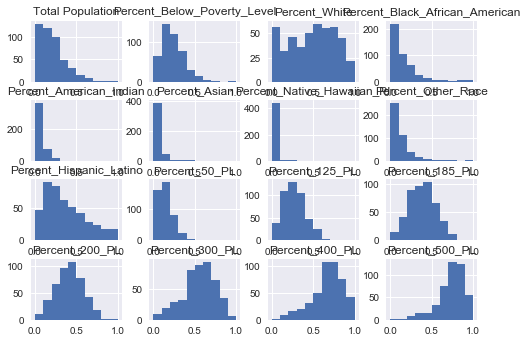

In [22]:
X_norm.hist()

In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Check the score
logreg.score(X_test, y_test)

0.2782608695652174

## Logistic Regression Just Carcinogens - Using Selected Features

In [26]:
#Using Boruta for feature selection

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

###initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['Total Population', 'Percent_125_PL']
features in the blue area: ['Percent_Asian']


In [27]:
X2 = df[green_area]
X2.head()

,Total Population,Percent_125_PL
0,47393,16.333636
1,17599,19.904540
2,31865,8.771379
3,33387,25.755534
4,24147,27.303599


In [28]:
#Normalize the data using z score
X2_norm = X2.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X2_norm.head()

,Total Population,Percent_125_PL
0,0.401741,0.216687
1,0.148996,0.264060
2,0.270016,0.116364
3,0.282927,0.341681
4,0.204544,0.362219


In [29]:
# Split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_norm, y, random_state=0)

In [30]:
# Instantiate the model
logreg2 = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg2.fit(X2_train, y2_train)

/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Check the score
logreg2.score(X2_test, y2_test)

0.33043478260869563

## Logistic Regression with All Chemicals, Not Just Carcinogens

In [32]:
df_chem = pd.read_csv('Cleaned Data/all_chem_per_zipcode.csv')
df_chem

,Unnamed: 0,ZIP,101. TOTAL RELEASES
0,0,77511,1.979512e+07
1,1,77536,1.593846e+07
2,2,77979,1.059076e+07
3,3,77590,8.548026e+06
4,4,77571,7.254232e+06
...,...,...,...
623,623,78629,0.000000e+00
624,624,77076,0.000000e+00
625,625,79935,0.000000e+00
626,626,75647,0.000000e+00


In [33]:
df_chem = df_chem.drop(columns='Unnamed: 0', axis = 1)
df_chem

,ZIP,101. TOTAL RELEASES
0,77511,1.979512e+07
1,77536,1.593846e+07
2,77979,1.059076e+07
3,77590,8.548026e+06
4,77571,7.254232e+06
...,...,...
623,78629,0.000000e+00
624,77076,0.000000e+00
625,79935,0.000000e+00
626,75647,0.000000e+00


In [34]:
#Rename Total Releases
df_chem = df_chem.rename(columns={'101. TOTAL RELEASES':'All Chem Total Releases'})
df_chem.head()

,ZIP,All Chem Total Releases
0,77511,1.979512e+07
1,77536,1.593846e+07
2,77979,1.059076e+07
3,77590,8.548026e+06
4,77571,7.254232e+06


In [35]:
df_chem.isna().sum()

ZIP                        0
All Chem Total Releases    0
dtype: int64

In [36]:
#Merge with previous dataframe
df_chem_merge = pd.merge(df_chem, df, on=["ZIP"])
df_chem_merge.head()

,ZIP,All Chem Total Releases,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Total Releases Binned
0,77511,1.979512e+07,4.881777e+06,47393,12.514506,55.833140,2.321018,0.160361,1.042348,0.027430,2.795772,39.896187,3.990041,16.333636,29.972781,32.215728,49.059988,64.382926,76.952293,4
1,77536,1.593846e+07,3.511945e+06,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015,4
2,77979,1.059076e+07,3.529298e+06,17599,13.267799,36.678220,2.977442,0.068186,6.273084,0.039775,1.948974,54.207625,3.812717,19.904540,34.876982,37.587363,55.719075,68.617535,79.442014,4
3,77590,8.548026e+06,3.205528e+05,31321,22.808978,41.524856,20.149421,0.472526,0.341624,0.303311,2.353054,33.878229,6.075796,29.472239,42.125092,45.902110,62.517161,75.019955,82.471824,4
4,77571,7.254232e+06,4.287650e+05,37298,9.528661,56.657193,5.946700,0.423615,1.177007,0.000000,4.480133,33.830232,3.394284,12.839831,21.097646,24.274760,42.163119,57.633117,67.126924,4


In [37]:
df_chem.describe()

,ZIP,All Chem Total Releases
count,628.000000,6.280000e+02
mean,77145.173567,3.077756e+05
std,1404.611699,1.364865e+06
min,75001.000000,0.000000e+00
25%,75967.000000,1.150250e+01
50%,77075.500000,4.657725e+03
75%,78250.250000,5.477388e+04
max,79936.000000,1.979512e+07


In [38]:
#Bin All Chemicals Column
bins = [0, 12, 5000, 55000, 20000000]
labels = [1,2,3,4]
df_chem_merge['All Chem Binned'] = pd.cut(df_chem_merge['All Chem Total Releases'], bins=bins, labels=labels)
df_chem_merge

,ZIP,All Chem Total Releases,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,...,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Total Releases Binned,All Chem Binned
0,77511,1.979512e+07,4.881777e+06,47393,12.514506,55.833140,2.321018,0.160361,1.042348,0.027430,...,39.896187,3.990041,16.333636,29.972781,32.215728,49.059988,64.382926,76.952293,4,4
1,77536,1.593846e+07,3.511945e+06,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,...,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015,4,4
2,77979,1.059076e+07,3.529298e+06,17599,13.267799,36.678220,2.977442,0.068186,6.273084,0.039775,...,54.207625,3.812717,19.904540,34.876982,37.587363,55.719075,68.617535,79.442014,4,4
3,77590,8.548026e+06,3.205528e+05,31321,22.808978,41.524856,20.149421,0.472526,0.341624,0.303311,...,33.878229,6.075796,29.472239,42.125092,45.902110,62.517161,75.019955,82.471824,4,4
4,77571,7.254232e+06,4.287650e+05,37298,9.528661,56.657193,5.946700,0.423615,1.177007,0.000000,...,33.830232,3.394284,12.839831,21.097646,24.274760,42.163119,57.633117,67.126924,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,77092,0.000000e+00,0.000000e+00,38312,31.483608,20.594070,11.134892,0.044373,1.524327,0.000000,...,65.483399,11.998852,38.959073,56.368762,60.774692,72.794425,80.802360,87.069326,1,NaN
456,78501,0.000000e+00,0.000000e+00,62366,26.144053,10.201071,0.622134,0.367187,1.959401,0.094603,...,87.344066,11.235288,34.238207,49.012282,52.745085,67.604143,79.233877,84.966167,1,NaN
457,77077,0.000000e+00,0.000000e+00,59449,10.905146,39.746674,21.640398,0.348198,12.881630,0.117748,...,22.883480,4.899998,14.937173,23.934801,25.416744,39.053643,51.376810,61.242409,1,NaN
458,77515,0.000000e+00,0.000000e+00,29106,11.530269,56.345771,7.950251,0.666529,2.123274,0.000000,...,31.618910,6.294235,15.611901,24.019103,26.671477,46.031746,62.155569,73.026180,1,NaN


In [39]:
df_chem_merge['All Chem Binned'].fillna(1, inplace=True)
df_chem_merge

,ZIP,All Chem Total Releases,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,...,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Total Releases Binned,All Chem Binned
0,77511,1.979512e+07,4.881777e+06,47393,12.514506,55.833140,2.321018,0.160361,1.042348,0.027430,...,39.896187,3.990041,16.333636,29.972781,32.215728,49.059988,64.382926,76.952293,4,4
1,77536,1.593846e+07,3.511945e+06,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,...,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015,4,4
2,77979,1.059076e+07,3.529298e+06,17599,13.267799,36.678220,2.977442,0.068186,6.273084,0.039775,...,54.207625,3.812717,19.904540,34.876982,37.587363,55.719075,68.617535,79.442014,4,4
3,77590,8.548026e+06,3.205528e+05,31321,22.808978,41.524856,20.149421,0.472526,0.341624,0.303311,...,33.878229,6.075796,29.472239,42.125092,45.902110,62.517161,75.019955,82.471824,4,4
4,77571,7.254232e+06,4.287650e+05,37298,9.528661,56.657193,5.946700,0.423615,1.177007,0.000000,...,33.830232,3.394284,12.839831,21.097646,24.274760,42.163119,57.633117,67.126924,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,77092,0.000000e+00,0.000000e+00,38312,31.483608,20.594070,11.134892,0.044373,1.524327,0.000000,...,65.483399,11.998852,38.959073,56.368762,60.774692,72.794425,80.802360,87.069326,1,1
456,78501,0.000000e+00,0.000000e+00,62366,26.144053,10.201071,0.622134,0.367187,1.959401,0.094603,...,87.344066,11.235288,34.238207,49.012282,52.745085,67.604143,79.233877,84.966167,1,1
457,77077,0.000000e+00,0.000000e+00,59449,10.905146,39.746674,21.640398,0.348198,12.881630,0.117748,...,22.883480,4.899998,14.937173,23.934801,25.416744,39.053643,51.376810,61.242409,1,1
458,77515,0.000000e+00,0.000000e+00,29106,11.530269,56.345771,7.950251,0.666529,2.123274,0.000000,...,31.618910,6.294235,15.611901,24.019103,26.671477,46.031746,62.155569,73.026180,1,1


In [40]:
#Make X and y
y4 = df_chem_merge['All Chem Binned']
y4

0      4
1      4
2      4
3      4
4      4
      ..
455    1
456    1
457    1
458    1
459    1
Name: All Chem Binned, Length: 460, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [41]:
X4 = df_chem_merge.drop(columns=['ZIP', 'Total Releases', 'Total Releases Binned', 'All Chem Total Releases', 'All Chem Binned'], axis=1)
X4

,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL
0,47393,12.514506,55.833140,2.321018,0.160361,1.042348,0.027430,2.795772,39.896187,3.990041,16.333636,29.972781,32.215728,49.059988,64.382926,76.952293
1,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015
2,17599,13.267799,36.678220,2.977442,0.068186,6.273084,0.039775,1.948974,54.207625,3.812717,19.904540,34.876982,37.587363,55.719075,68.617535,79.442014
3,31321,22.808978,41.524856,20.149421,0.472526,0.341624,0.303311,2.353054,33.878229,6.075796,29.472239,42.125092,45.902110,62.517161,75.019955,82.471824
4,37298,9.528661,56.657193,5.946700,0.423615,1.177007,0.000000,4.480133,33.830232,3.394284,12.839831,21.097646,24.274760,42.163119,57.633117,67.126924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,38312,31.483608,20.594070,11.134892,0.044373,1.524327,0.000000,37.241595,65.483399,11.998852,38.959073,56.368762,60.774692,72.794425,80.802360,87.069326
456,62366,26.144053,10.201071,0.622134,0.367187,1.959401,0.094603,23.666741,87.344066,11.235288,34.238207,49.012282,52.745085,67.604143,79.233877,84.966167
457,59449,10.905146,39.746674,21.640398,0.348198,12.881630,0.117748,3.196017,22.883480,4.899998,14.937173,23.934801,25.416744,39.053643,51.376810,61.242409
458,29106,11.530269,56.345771,7.950251,0.666529,2.123274,0.000000,6.380128,31.618910,6.294235,15.611901,24.019103,26.671477,46.031746,62.155569,73.026180


In [42]:
#Normalize the data using z score
X4_norm = X4.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X4_norm.head()

,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL
0,0.401741,0.190438,0.601237,0.030074,0.020796,0.020539,0.005441,0.069090,0.407563,0.092401,0.216687,0.349609,0.368712,0.488945,0.632559,0.724385
1,0.270016,0.113420,0.626222,0.018786,0.119651,0.032588,0.000000,0.069565,0.381694,0.075873,0.116364,0.218496,0.238959,0.343626,0.519388,0.607452
2,0.148996,0.201901,0.390529,0.038579,0.008842,0.123606,0.007889,0.048164,0.553763,0.088294,0.264060,0.406813,0.430191,0.568583,0.682650,0.754158
3,0.265401,0.347093,0.443843,0.261078,0.061278,0.006731,0.060162,0.058149,0.346086,0.140703,0.390988,0.491356,0.525354,0.649883,0.758384,0.790390
4,0.316104,0.145001,0.610302,0.077052,0.054935,0.023192,0.000000,0.110715,0.345596,0.078604,0.170337,0.246087,0.277827,0.406463,0.552716,0.606889


In [43]:
# Split the data into training and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_norm, y4, random_state=0)

In [44]:
# Instantiate the model
logreg4 = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg4.fit(X4_train, y4_train)

/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Check the score
logreg4.score(X4_test, y4_test)

0.30434782608695654

## Linear Regression with All Chemicals

In [46]:
#Make new y
y_all_chem = df_chem_merge['All Chem Total Releases']
y_all_chem.head()

0    1.979512e+07
1    1.593846e+07
2    1.059076e+07
3    8.548026e+06
4    7.254232e+06
Name: All Chem Total Releases, dtype: float64

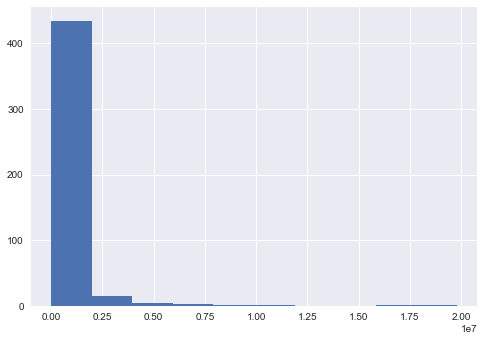

In [47]:
y_all_chem.hist()

In [50]:
X3 = df_chem_merge.drop(columns=['ZIP', 'Total Releases', 'Total Releases Binned', 'All Chem Total Releases', 'All Chem Binned'], axis=1)

In [52]:
#Normalize the data using z score
X3_norm = X3.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X3_norm.head()

,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL
0,0.401741,0.190438,0.601237,0.030074,0.020796,0.020539,0.005441,0.069090,0.407563,0.092401,0.216687,0.349609,0.368712,0.488945,0.632559,0.724385
1,0.270016,0.113420,0.626222,0.018786,0.119651,0.032588,0.000000,0.069565,0.381694,0.075873,0.116364,0.218496,0.238959,0.343626,0.519388,0.607452
2,0.148996,0.201901,0.390529,0.038579,0.008842,0.123606,0.007889,0.048164,0.553763,0.088294,0.264060,0.406813,0.430191,0.568583,0.682650,0.754158
3,0.265401,0.347093,0.443843,0.261078,0.061278,0.006731,0.060162,0.058149,0.346086,0.140703,0.390988,0.491356,0.525354,0.649883,0.758384,0.790390
4,0.316104,0.145001,0.610302,0.077052,0.054935,0.023192,0.000000,0.110715,0.345596,0.078604,0.170337,0.246087,0.277827,0.406463,0.552716,0.606889


In [53]:
#Create model
X_int = sm.add_constant(X3_norm)
model = sm.OLS(y_all_chem,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     All Chem Total Releases   R-squared:                       0.024
Model:                                 OLS   Adj. R-squared:                 -0.011
Method:                      Least Squares   F-statistic:                    0.6799
Date:                     Wed, 28 Apr 2021   Prob (F-statistic):              0.815
Time:                             17:44:09   Log-Likelihood:                -7212.0
No. Observations:                      460   AIC:                         1.446e+04
Df Residuals:                          443   BIC:                         1.453e+04
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -2.109e+06   5.84e+06     -0.361      0.718   -1.36e+07    9.37e+06
Total Population                1.754e+05   5.34e+05      0.328      0.743   -8.74e+05    1.22e+06
Percent_Below_Poverty_Level     1.823e+06   2.52e+06      0.722      0.471   -3.14e+06    6.78e+06
Percent_White                   2.294e+06   5.44e+06      0.422      0.673   -8.39e+06     1.3e+07
Percent_Black_African_American  1.639e+06   4.51e+06      0.363      0.717   -7.23e+06    1.05e+07
Percent_American_Indian        -8.087e+05   8.73e+05     -0.926      0.355   -2.52e+06    9.07e+05
Percent_Asian                   2.018e+05   3.31e+06      0.061      0.951    -6.3e+06    6.71e+06
Percent_Native_Hawaiian_PI      6.886e+04   1.15e+06      0.060      0.952   -2.18e+06    2.32e+06
Percent_Other_Race              -9.31e+05   5.08e+05     -1.832      0.068   -1.93e+06    6.77e+04
Percent_Hispanic_Latino         2.603e+06   5.67e+06      0.459      0.647   -8.55e+06    1.38e+07
Percent_50_PL                  -1.079e+06   1.18e+06     -0.915      0.361    -3.4e+06    1.24e+06
Percent_125_PL                 -1.258e+06   3.25e+06     -0.388      0.698   -7.64e+06    5.12e+06
Percent_185_PL                  3.411e+06   3.99e+06      0.855      0.393   -4.43e+06    1.13e+07
Percent_200_PL                 -2.528e+06   3.88e+06     -0.652      0.515   -1.01e+07    5.09e+06
Percent_300_PL                 -2.341e+06   2.08e+06     -1.127      0.260   -6.42e+06    1.74e+06
Percent_400_PL                  1.656e+06   2.11e+06      0.784      0.433   -2.49e+06    5.81e+06
Percent_500_PL                  3.686e+05    1.5e+06      0.246      0.806   -2.58e+06    3.31e+06
==============================================================================
Omnibus:                      659.123   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105739.186
Skew:                           7.548   Prob(JB):                         0.00
Kurtosis:                      75.725   Cond. No.                         278.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Decision Tree 

In [54]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X4_train, y4_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [55]:
# Make predictions for test data
y4_pred = classifier.predict(X4_test)

In [56]:
# Calculate accuracy 
acc = accuracy_score(y4_test,y4_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y4_test, y4_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :30.434782608695656

Confusion Matrix
----------------


Predicted,1,2,3,4,All
True,,,,,
1,6,3,6,4,19
2,5,8,9,8,30
3,5,9,6,9,29
4,11,3,8,15,37
All,27,23,29,36,115


## Random Forest

In [57]:
# Instantiate and fit a RandomForestClassifier using green columns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X4_train, y4_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
#Test accuracy 
forest.score(X4_train, y4_train)

0.7942028985507247

In [59]:
forest.score(X4_test, y4_test)

0.2608695652173913

In [72]:
X4_train = X4_train.rename(columns={'Percent_50_PL':'Percent Population Living Below 50 Percent of Poverty Line',
                                    'Percent_125_PL':'Percent Population Living Below 125 Percent of Poverty Line',
                                    'Percent_200_PL':'Percent Population Living Below 200 Percent of Poverty Line',
                                    'Percent_300_PL':'Percent Population Living Below 300 Percent of Poverty Line',
                                    'Percent_400_PL':'Percent Population Living Below 400 Percent of Poverty Line',
                                    'Percent_500_PL':'Percent Population Living Below 500 Percent of Povety Line'})

In [108]:
df_feature_barh = {'Feature Importance': forest.feature_importances_,
                   'Features': X4_train.columns}
df_feature_barh

{'Feature Importance': array([0.09980951, 0.06718589, 0.06008891, 0.0459882 , 0.10626543,
        0.07158156, 0.03447773, 0.05739608, 0.0548835 , 0.05492775,
        0.07955611, 0.05821112, 0.05970302, 0.04283579, 0.04852353,
        0.05856588]),
 'Features': Index(['Total Population', 'Percent_Below_Poverty_Level', 'Percent_White',
        'Percent_Black_African_American', 'Percent_American_Indian',
        'Percent_Asian', 'Percent_Native_Hawaiian_PI', 'Percent_Other_Race',
        'Percent_Hispanic_Latino',
        'Percent Population Living Below 50 Percent of Poverty Line',
        'Percent Population Living Below 125 Percent of Poverty Line',
        'Percent_185_PL',
        'Percent Population Living Below 200 Percent of Poverty Line',
        'Percent Population Living Below 300 Percent of Poverty Line',
        'Percent Population Living Below 400 Percent of Poverty Line',
        'Percent Population Living Below 500 Percent of Povety Line'],
       dtype='object')}

In [109]:
df_feature_barh = pd.DataFrame(df_feature_barh)
df_feature_barh

,Feature Importance,Features
0,0.099810,Total Population
1,0.067186,Percent_Below_Poverty_Level
2,0.060089,Percent_White
3,0.045988,Percent_Black_African_American
4,0.106265,Percent_American_Indian
5,0.071582,Percent_Asian
6,0.034478,Percent_Native_Hawaiian_PI
7,0.057396,Percent_Other_Race
8,0.054883,Percent_Hispanic_Latino
9,0.054928,Percent Population Living Below 50 Percent of ...


In [113]:
df_feature_barh = df_feature_barh.sort_values(by=['Feature Importance'])
df_feature_barh

,Feature Importance,Features
6,0.034478,Percent_Native_Hawaiian_PI
13,0.042836,Percent Population Living Below 300 Percent of...
3,0.045988,Percent_Black_African_American
14,0.048524,Percent Population Living Below 400 Percent of...
8,0.054883,Percent_Hispanic_Latino
9,0.054928,Percent Population Living Below 50 Percent of ...
7,0.057396,Percent_Other_Race
11,0.058211,Percent_185_PL
15,0.058566,Percent Population Living Below 500 Percent of...
12,0.059703,Percent Population Living Below 200 Percent of...


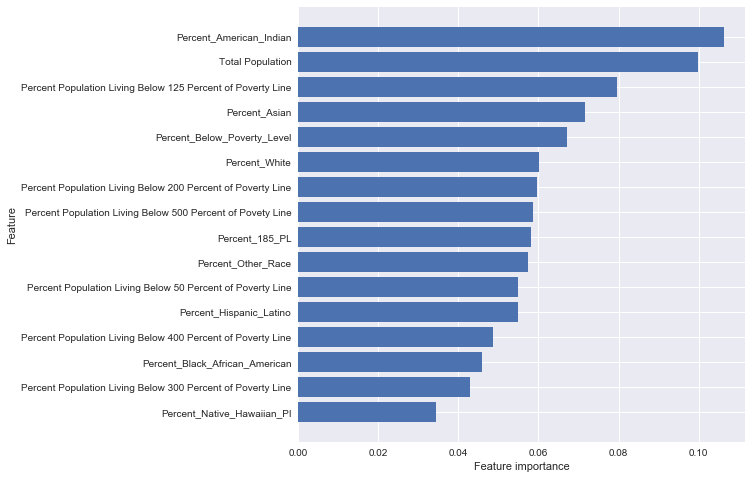

In [114]:
plt.figure(figsize=(8,8))
plt.barh('Features', 'Feature Importance', data=df_feature_barh, align='center')
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

## Hyperparameter Tuning
From [Towards Data Science article](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [143]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [144]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [145]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X4_train, y4_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished
/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [151]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [152]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90],
    'max_features': [3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [153]:
# Fit the grid search to the data
grid_search.fit(X4_train, y4_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.4min finished
/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [154]:
y4_test = y4_test.astype(int)

In [155]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X4_test, y4_test)

Model Performance
Average Error: 1.0174 degrees.
Accuracy = 45.22%.


In [183]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
df_bestgrid_barh = {'Feature Importance': best_grid.feature_importances_,
                   'Features': X4_train.columns}
df_bestgrid_barh

{'Feature Importance': array([0.08015201, 0.0694919 , 0.0536213 , 0.05626972, 0.10905719,
        0.07331679, 0.03750883, 0.05689608, 0.05769293, 0.06009624,
        0.06973088, 0.05618397, 0.05562831, 0.04910572, 0.05437693,
        0.06087121]),
 'Features': Index(['Total Population', 'Percent_Below_Poverty_Level', 'Percent_White',
        'Percent_Black_African_American', 'Percent_American_Indian',
        'Percent_Asian', 'Percent_Native_Hawaiian_PI', 'Percent_Other_Race',
        'Percent_Hispanic_Latino',
        'Percent Population Living Below 50 Percent of Poverty Line',
        'Percent Population Living Below 125 Percent of Poverty Line',
        'Percent_185_PL',
        'Percent Population Living Below 200 Percent of Poverty Line',
        'Percent Population Living Below 300 Percent of Poverty Line',
        'Percent Population Living Below 400 Percent of Poverty Line',
        'Percent Population Living Below 500 Percent of Povety Line'],
       dtype='object')}

In [158]:
df_bestgrid_barh = pd.DataFrame(df_bestgrid_barh)
df_bestgrid_barh

,Feature Importance,Features
0,0.080152,Total Population
1,0.069492,Percent_Below_Poverty_Level
2,0.053621,Percent_White
3,0.056270,Percent_Black_African_American
4,0.109057,Percent_American_Indian
5,0.073317,Percent_Asian
6,0.037509,Percent_Native_Hawaiian_PI
7,0.056896,Percent_Other_Race
8,0.057693,Percent_Hispanic_Latino
9,0.060096,Percent Population Living Below 50 Percent of ...


In [159]:
df_bestgrid_barh = df_bestgrid_barh.sort_values(by=['Feature Importance'])
df_bestgrid_barh

,Feature Importance,Features
6,0.037509,Percent_Native_Hawaiian_PI
13,0.049106,Percent Population Living Below 300 Percent of...
2,0.053621,Percent_White
14,0.054377,Percent Population Living Below 400 Percent of...
12,0.055628,Percent Population Living Below 200 Percent of...
11,0.056184,Percent_185_PL
3,0.056270,Percent_Black_African_American
7,0.056896,Percent_Other_Race
8,0.057693,Percent_Hispanic_Latino
9,0.060096,Percent Population Living Below 50 Percent of ...


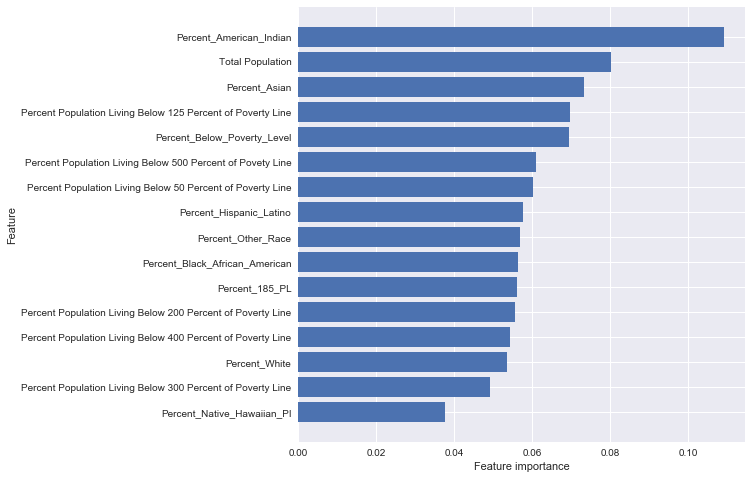

In [160]:
plt.figure(figsize=(8,8))
plt.barh('Features', 'Feature Importance', data=df_bestgrid_barh, align='center')
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

In [146]:
df_chem_merge = df_chem_merge.rename(columns={'All Chem Binned':'Total Toxic Releases Categories'})

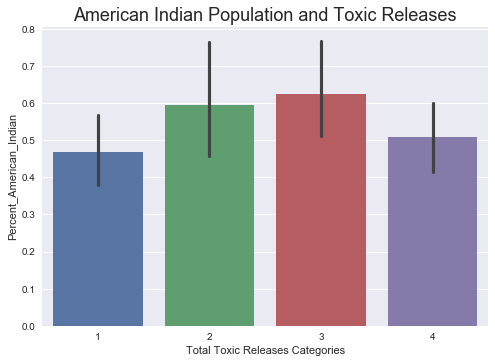

In [171]:
ax = sns.barplot(x="Total Toxic Releases Categories", y="Percent_American_Indian", data=df_chem_merge).set_title('American Indian Population and Toxic Releases', fontsize=18)

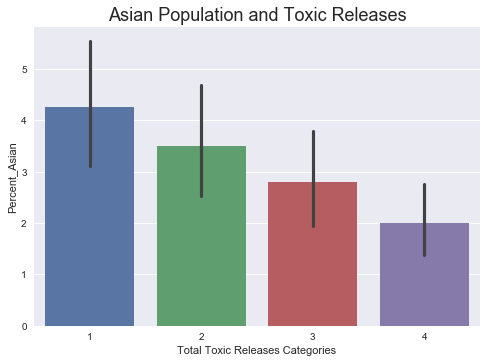

In [172]:
ax = sns.barplot(x="Total Toxic Releases Categories", y="Percent_Asian", data=df_chem_merge).set_title("Asian Population and Toxic Releases", fontsize=18)

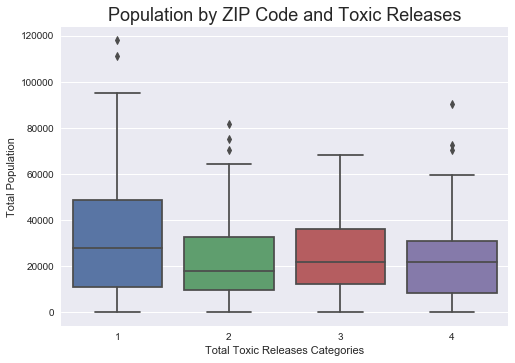

In [174]:
ax = sns.boxplot(x="Total Toxic Releases Categories", y="Total Population", data=df_chem_merge).set_title("Population by ZIP Code and Toxic Releases", fontsize=18)

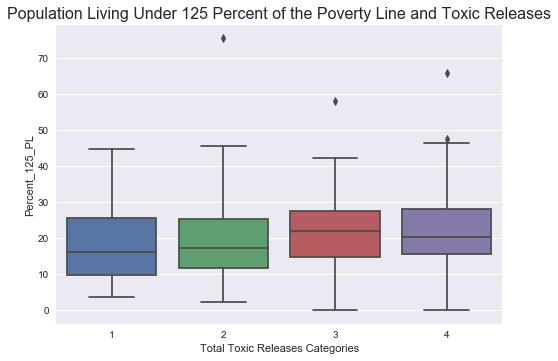

In [178]:
ax = sns.boxplot(x="Total Toxic Releases Categories", y="Percent_125_PL", data=df_chem_merge).set_title('Population Living Under 125 Percent of the Poverty Line and Toxic Releases', fontsize=16)

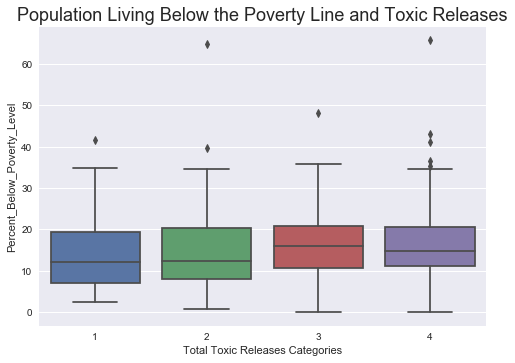

In [179]:
ax = sns.boxplot(x="Total Toxic Releases Categories", y="Percent_Below_Poverty_Level", data=df_chem_merge).set_title('Population Living Below the Poverty Line and Toxic Releases', fontsize=18)

In [184]:
y4_pred_forest = best_grid.predict(X4_test)

In [180]:
type(y4_pred_forest)

numpy.ndarray

In [181]:
type(y4_test)

pandas.core.series.Series

In [140]:
y4_test

329    2
153    3
135    4
78     4
452    1
      ..
8      4
377    1
5      4
134    4
213    3
Name: All Chem Binned, Length: 115, dtype: int64

In [185]:
y4_pred_forest

array([2, 2, 4, 3, 4, 4, 1, 3, 4, 2, 2, 3, 2, 4, 4, 3, 2, 2, 4, 2, 3, 4,
       1, 3, 2, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4, 2, 3, 2, 3, 1, 3, 4, 3, 2,
       4, 1, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 4, 2, 1, 2, 3, 4, 4, 2, 4, 3,
       3, 3, 2, 2, 4, 1, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 3, 3, 2, 3, 3, 4,
       4, 3, 4, 3, 4, 2, 3, 4, 2, 4, 3, 3, 4, 2, 2, 3, 2, 2, 4, 4, 1, 1,
       3, 2, 3, 2, 2])

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y4_test, y4_pred_forest))

              precision    recall  f1-score   support

           1       0.44      0.21      0.29        19
           2       0.22      0.20      0.21        30
           3       0.26      0.34      0.30        29
           4       0.39      0.43      0.41        37

    accuracy                           0.31       115
   macro avg       0.33      0.30      0.30       115
weighted avg       0.32      0.31      0.31       115



In [188]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y4_test, y4_pred_forest))

[[ 4  4  6  5]
 [ 3  6 10 11]
 [ 2  8 10  9]
 [ 0  9 12 16]]


# Creating a Model Only Looking at Harris County

In [189]:
df_harris = pd.read_csv('Cleaned Data/harris_county_df.csv')
df_harris

,Unnamed: 0,ZIP,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL
0,0,77536,1.593846e+07,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015
1,1,77571,7.254232e+06,37298,9.528661,56.657193,5.946700,0.423615,1.177007,0.000000,4.480133,33.830232,3.394284,12.839831,21.097646,24.274760,42.163119,57.633117,67.126924
2,2,77530,4.999060e+06,33387,16.922754,18.770779,12.441968,0.000000,0.185701,0.000000,3.240782,67.472369,9.488723,25.755534,39.997604,42.121185,61.014766,80.252793,87.507114
3,3,77520,4.044139e+06,35114,18.118130,29.455488,12.946403,0.065501,0.734750,0.082588,10.050122,54.978071,6.407701,23.950561,36.765962,39.366065,62.055021,75.226405,82.995386
4,4,77507,3.543322e+06,312,19.230769,68.269231,14.423077,0.000000,0.000000,0.000000,4.487179,17.307692,19.230769,19.230769,32.051282,39.423077,45.833333,60.256410,75.961538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,77076,0.000000e+00,35866,30.898344,4.826298,6.220376,0.225841,0.471198,0.000000,5.172029,88.431941,11.841298,37.021134,55.863492,61.453744,82.495957,92.129036,96.807561
72,72,77077,0.000000e+00,59449,10.905146,39.746674,21.640398,0.348198,12.881630,0.117748,3.196017,22.883480,4.899998,14.937173,23.934801,25.416744,39.053643,51.376810,61.242409
73,73,77043,0.000000e+00,24608,13.666287,43.006339,4.396944,0.000000,8.797952,0.000000,5.689207,43.042913,6.351593,19.497724,30.234070,33.521619,48.390767,63.255852,70.042263
74,74,77033,0.000000e+00,30438,27.919049,1.176161,66.499113,0.111702,0.298968,0.147842,2.881267,31.693935,10.125501,38.264669,55.900519,59.800250,77.735068,88.931599,94.056771


In [190]:
df_harris = df_harris.drop(columns='Unnamed: 0', axis = 1)
df_harris.head()

,ZIP,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL
0,77536,1.593846e+07,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015
1,77571,7.254232e+06,37298,9.528661,56.657193,5.946700,0.423615,1.177007,0.000000,4.480133,33.830232,3.394284,12.839831,21.097646,24.274760,42.163119,57.633117,67.126924
2,77530,4.999060e+06,33387,16.922754,18.770779,12.441968,0.000000,0.185701,0.000000,3.240782,67.472369,9.488723,25.755534,39.997604,42.121185,61.014766,80.252793,87.507114
3,77520,4.044139e+06,35114,18.118130,29.455488,12.946403,0.065501,0.734750,0.082588,10.050122,54.978071,6.407701,23.950561,36.765962,39.366065,62.055021,75.226405,82.995386
4,77507,3.543322e+06,312,19.230769,68.269231,14.423077,0.000000,0.000000,0.000000,4.487179,17.307692,19.230769,19.230769,32.051282,39.423077,45.833333,60.256410,75.961538


## Linear Regression Harris County 

In [191]:
y_harris = df_harris['Total Releases']
y_harris.head()

0    1.593846e+07
1    7.254232e+06
2    4.999060e+06
3    4.044139e+06
4    3.543322e+06
Name: Total Releases, dtype: float64

In [192]:
X_harris = df_harris.drop(columns=['ZIP', 'Total Releases'], axis=1)

In [193]:
#Normalize the data using z score
X_harris_norm = X_harris.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X_harris_norm.head()

,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL
0,0.268296,0.181509,0.626222,0.009625,0.388505,0.066701,0.000000,0.059827,0.397510,0.111534,0.184508,0.229771,0.241730,0.340962,0.476344,0.560309
1,0.314493,0.232050,0.610302,0.068435,0.178375,0.047469,0.000000,0.095217,0.359916,0.115549,0.270088,0.267314,0.292387,0.407082,0.513171,0.559644
2,0.281238,0.412116,0.193544,0.153381,0.000000,0.007489,0.000000,0.068877,0.717831,0.323018,0.541772,0.567275,0.558596,0.644312,0.808827,0.847362
3,0.295923,0.441227,0.311078,0.159978,0.027581,0.029633,0.181142,0.213596,0.584906,0.218133,0.503804,0.515986,0.517499,0.657402,0.743129,0.783667
4,0.000000,0.468323,0.738036,0.179290,0.000000,0.000000,0.000000,0.095366,0.184135,0.654661,0.404523,0.441159,0.518349,0.453268,0.547459,0.684367


In [194]:
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_harris_norm), np.array(y_harris))
### print results
green_area = X_harris_norm.columns[boruta.support_].to_list()
blue_area = X_harris_norm.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: []
features in the blue area: []


In [195]:
#Create model
X_harris_int = sm.add_constant(X_harris_norm)
model = sm.OLS(y_harris,X_harris_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total Releases   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.277
Date:                Thu, 29 Apr 2021   Prob (F-statistic):              0.242
Time:                        13:28:50   Log-Likelihood:                -1204.3
No. Observations:                  76   AIC:                             2443.
Df Residuals:                      59   BIC:                             2482.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.001e+07   4.02e+07     -0.249      0.804   -9.05e+07    7.05e+07
Total Population                9.274e+05   1.74e+06      0.534      0.595   -2.55e+06     4.4e+06
Percent_Below_Poverty_Level     6.793e+06   6.84e+06      0.993      0.325    -6.9e+06    2.05e+07
Percent_White                   1.174e+07   3.81e+07      0.308      0.759   -6.45e+07     8.8e+07
Percent_Black_African_American  6.015e+06   3.12e+07      0.193      0.848   -5.64e+07    6.84e+07
Percent_American_Indian         1.558e+06   1.71e+06      0.910      0.367   -1.87e+06    4.99e+06
Percent_Asian                   1.126e+05   1.08e+07      0.010      0.992   -2.15e+07    2.17e+07
Percent_Native_Hawaiian_PI     -9.038e+05   1.32e+06     -0.685      0.496   -3.54e+06    1.74e+06
Percent_Other_Race             -7.048e+05   1.37e+06     -0.516      0.608   -3.44e+06    2.03e+06
Percent_Hispanic_Latino         8.119e+06   3.81e+07      0.213      0.832   -6.81e+07    8.43e+07
Percent_50_PL                  -2.996e+04   3.13e+06     -0.010      0.992   -6.29e+06    6.23e+06
Percent_125_PL                   -4.3e+06   7.84e+06     -0.549      0.585      -2e+07    1.14e+07
Percent_185_PL                  3.512e+06   1.34e+07      0.261      0.795   -2.34e+07    3.04e+07
Percent_200_PL                  -5.76e+06   1.35e+07     -0.427      0.671   -3.27e+07    2.12e+07
Percent_300_PL                  -1.93e+07   1.14e+07     -1.690      0.096   -4.21e+07    3.55e+06
Percent_400_PL                  2.934e+07   1.46e+07      2.005      0.050    6.42e+04    5.86e+07
Percent_500_PL                 -8.594e+06   9.41e+06     -0.914      0.365   -2.74e+07    1.02e+07
==============================================================================
Omnibus:                       96.188   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1713.142
Skew:                           3.827   Prob(JB):                         0.00
Kurtosis:                      24.964   Cond. No.                         676.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression Harris County

In [196]:
df_harris['Total Releases'].describe()

count    7.600000e+01
mean     6.137768e+05
std      2.152041e+06
min      0.000000e+00
25%      3.250000e+01
50%      6.436300e+03
75%      1.206785e+05
max      1.593846e+07
Name: Total Releases, dtype: float64

In [197]:
#Bin Harris Releases
bins_harris = [0, 35, 7000, 125000, 20000000]
labels = [1,2,3,4]
df_harris['Harris Releases Binned'] = pd.cut(df_harris['Total Releases'], bins=bins, labels=labels)
df_harris

,ZIP,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Harris Releases Binned
0,77536,1.593846e+07,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015,4
1,77571,7.254232e+06,37298,9.528661,56.657193,5.946700,0.423615,1.177007,0.000000,4.480133,33.830232,3.394284,12.839831,21.097646,24.274760,42.163119,57.633117,67.126924,4
2,77530,4.999060e+06,33387,16.922754,18.770779,12.441968,0.000000,0.185701,0.000000,3.240782,67.472369,9.488723,25.755534,39.997604,42.121185,61.014766,80.252793,87.507114,4
3,77520,4.044139e+06,35114,18.118130,29.455488,12.946403,0.065501,0.734750,0.082588,10.050122,54.978071,6.407701,23.950561,36.765962,39.366065,62.055021,75.226405,82.995386,4
4,77507,3.543322e+06,312,19.230769,68.269231,14.423077,0.000000,0.000000,0.000000,4.487179,17.307692,19.230769,19.230769,32.051282,39.423077,45.833333,60.256410,75.961538,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,77076,0.000000e+00,35866,30.898344,4.826298,6.220376,0.225841,0.471198,0.000000,5.172029,88.431941,11.841298,37.021134,55.863492,61.453744,82.495957,92.129036,96.807561,NaN
72,77077,0.000000e+00,59449,10.905146,39.746674,21.640398,0.348198,12.881630,0.117748,3.196017,22.883480,4.899998,14.937173,23.934801,25.416744,39.053643,51.376810,61.242409,NaN
73,77043,0.000000e+00,24608,13.666287,43.006339,4.396944,0.000000,8.797952,0.000000,5.689207,43.042913,6.351593,19.497724,30.234070,33.521619,48.390767,63.255852,70.042263,NaN
74,77033,0.000000e+00,30438,27.919049,1.176161,66.499113,0.111702,0.298968,0.147842,2.881267,31.693935,10.125501,38.264669,55.900519,59.800250,77.735068,88.931599,94.056771,NaN


In [198]:
df_harris['Harris Releases Binned'].fillna(1, inplace=True)
df_harris

,ZIP,Total Releases,Total Population,Percent_Below_Poverty_Level,Percent_White,Percent_Black_African_American,Percent_American_Indian,Percent_Asian,Percent_Native_Hawaiian_PI,Percent_Other_Race,Percent_Hispanic_Latino,Percent_50_PL,Percent_125_PL,Percent_185_PL,Percent_200_PL,Percent_300_PL,Percent_400_PL,Percent_500_PL,Harris Releases Binned
0,77536,1.593846e+07,31865,7.453319,58.104503,1.449867,0.922642,1.653852,0.000000,2.815001,37.363879,3.276322,8.771379,18.732151,20.878707,36.908834,54.815628,67.174015,4
1,77571,7.254232e+06,37298,9.528661,56.657193,5.946700,0.423615,1.177007,0.000000,4.480133,33.830232,3.394284,12.839831,21.097646,24.274760,42.163119,57.633117,67.126924,4
2,77530,4.999060e+06,33387,16.922754,18.770779,12.441968,0.000000,0.185701,0.000000,3.240782,67.472369,9.488723,25.755534,39.997604,42.121185,61.014766,80.252793,87.507114,4
3,77520,4.044139e+06,35114,18.118130,29.455488,12.946403,0.065501,0.734750,0.082588,10.050122,54.978071,6.407701,23.950561,36.765962,39.366065,62.055021,75.226405,82.995386,4
4,77507,3.543322e+06,312,19.230769,68.269231,14.423077,0.000000,0.000000,0.000000,4.487179,17.307692,19.230769,19.230769,32.051282,39.423077,45.833333,60.256410,75.961538,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,77076,0.000000e+00,35866,30.898344,4.826298,6.220376,0.225841,0.471198,0.000000,5.172029,88.431941,11.841298,37.021134,55.863492,61.453744,82.495957,92.129036,96.807561,1
72,77077,0.000000e+00,59449,10.905146,39.746674,21.640398,0.348198,12.881630,0.117748,3.196017,22.883480,4.899998,14.937173,23.934801,25.416744,39.053643,51.376810,61.242409,1
73,77043,0.000000e+00,24608,13.666287,43.006339,4.396944,0.000000,8.797952,0.000000,5.689207,43.042913,6.351593,19.497724,30.234070,33.521619,48.390767,63.255852,70.042263,1
74,77033,0.000000e+00,30438,27.919049,1.176161,66.499113,0.111702,0.298968,0.147842,2.881267,31.693935,10.125501,38.264669,55.900519,59.800250,77.735068,88.931599,94.056771,1


In [199]:
y_logreg = df_harris['Harris Releases Binned']
y_logreg

0     4
1     4
2     4
3     4
4     4
     ..
71    1
72    1
73    1
74    1
75    1
Name: Harris Releases Binned, Length: 76, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [200]:
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_harris_norm), np.array(y_logreg))
### print results
green_area = X_harris_norm.columns[boruta.support_].to_list()
blue_area = X_harris_norm.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['Percent_Asian']
features in the blue area: []


In [201]:
X_logreg = X_harris_norm[['Percent_Asian', 'Total Population', 'Percent_125_PL', 'Percent_Below_Poverty_Level']]

In [202]:
# Split the data into training and test sets
XH_train, XH_test, yH_train, yH_test = train_test_split(X_harris_norm, y_logreg, random_state=0)

In [203]:
# Instantiate the model
logregH = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logregH.fit(XH_train, yH_train)

/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
# Check the score
logreg4.score(XH_test, yH_test)

0.21052631578947367